In [54]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
dt = pd.read_csv("data.csv")
dt

,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,5767,20395-16-8,O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C,Training,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5754,5768,34718-47-3,O=C(C(Br)(Br)Br)Cl,Training,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5755,5769,43204-63-3,N(CCBr)CCBr,Training,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5756,5770,52583-35-4,N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...,Training,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [56]:
dt.isnull().sum()

Id                     0
CAS                    0
SMILES                 0
Status                 0
Experimental value     0
Predicted value        0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64

In [57]:
dt.describe()

,Id,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
count,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000
mean,2884.895623,0.564258,0.574679,87.031087,0.514139,53.816429,65.092698,2.573690,520.670843,241.254551,2.586324
std,1666.416303,0.495897,0.494435,42.603017,0.165875,43.054712,30.781928,0.641105,378.010345,116.073192,1.939714
min,1.000000,0.000000,0.000000,10.000000,0.016502,0.000000,3.929500,0.854053,0.000000,28.010000,-13.262400
25%,1441.250000,0.000000,0.000000,60.000000,0.401795,26.020000,43.279900,2.130968,228.372017,165.192000,1.342250
50%,2884.500000,1.000000,1.000000,82.000000,0.513585,46.170000,62.225800,2.480737,460.689080,228.247000,2.466700
75%,4328.750000,1.000000,1.000000,104.000000,0.626246,72.435000,81.762675,2.953223,748.421726,290.811750,3.752295
max,5771.000000,1.000000,1.000000,490.000000,0.924384,633.360000,328.444600,6.947594,5033.685325,1550.188000,17.853900


<Axes: >

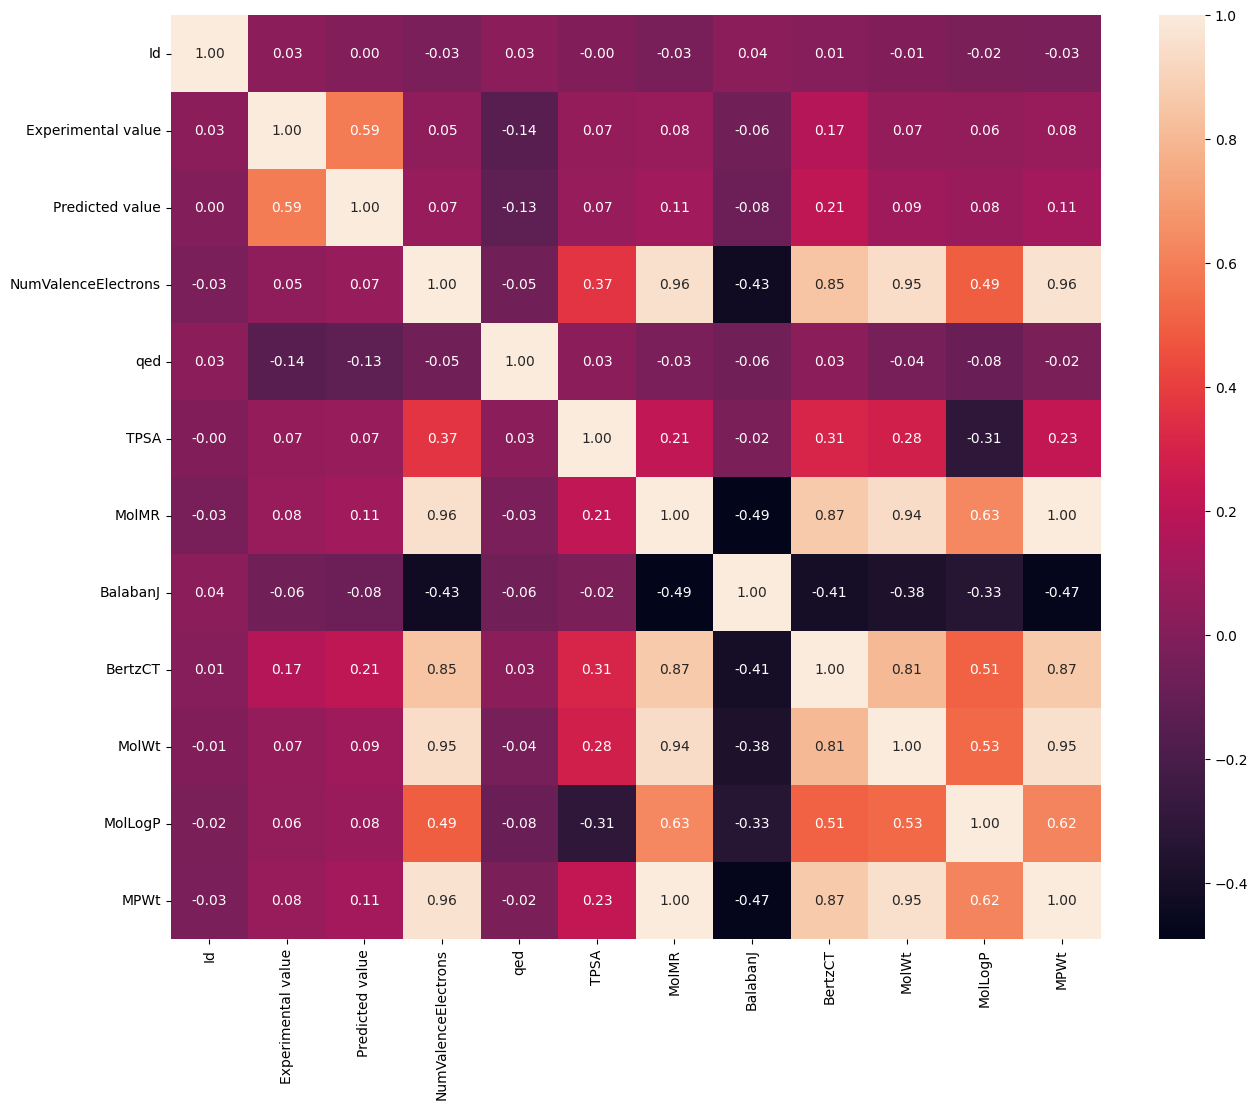

In [58]:
dt_new = dt.drop(columns=['CAS','SMILES','Status'])
dt_new['BertzCT'] = np.log1p(dt_new['BertzCT']) 
dt_new['MolWt'] = np.log1p(dt_new['MolWt'])
dt_new['TPSA']  = np.log1p(dt_new['TPSA'])
dt_new['MPWt'] = dt_new['MolWt']*dt_new['MolMR']
dt_new['MPWt']  = np.log1p(dt_new['MPWt'])
dt_new['NumValenceElectrons'] = np.log1p(dt_new['NumValenceElectrons'])
dt_new['MolMR']=np.log1p(dt_new['MolMR'])
dt_new['qed'] = 10*dt_new['qed']
plt.figure(figsize=(15,12))
sns.heatmap(data=dt_new[dt_new.columns].corr(), annot = True, fmt = ".2f")

In [75]:
l_c = dt_new.quantile(0.10)
u_c = dt_new.quantile(0.90)
new_dt = dt_new.clip(lower = l_c , upper= u_c ,axis = 1 );
new_dt.describe()

,Id,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP,MPWt
count,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000
mean,2884.854463,0.564258,0.574679,4.379020,5.159288,3.729638,4.093580,2.547533,5.965006,5.392766,2.574871,5.761169
std,1577.440385,0.495897,0.494435,0.343226,1.400038,0.702262,0.370315,0.486175,0.776331,0.343345,1.525891,0.437098
min,576.700000,0.000000,0.000000,3.806662,2.992140,2.372111,3.468112,1.880124,4.496489,4.813541,0.311800,5.017072
25%,1441.250000,0.000000,0.000000,4.110874,4.017951,3.296577,3.790531,2.130968,5.435345,5.113144,1.342250,5.407283
50%,2884.500000,1.000000,1.000000,4.418841,5.135848,3.853758,4.146712,2.480737,6.134892,5.434800,2.466700,5.825736
75%,4328.750000,1.000000,1.000000,4.653960,6.262465,4.296401,4.415977,2.953223,6.619302,5.676109,3.752295,6.145003
max,5193.300000,1.000000,1.000000,4.875197,7.375437,4.635408,4.596440,3.348524,6.922429,5.884771,5.132440,6.354376


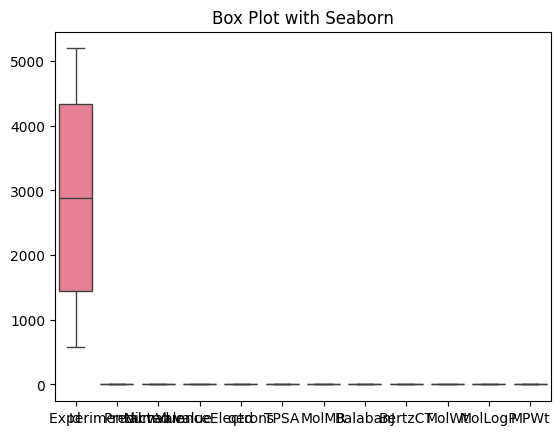

In [100]:
sns.boxplot(data=new_dt)

# Add title
plt.title("Box Plot with Seaborn")

plt.show()

<Axes: >

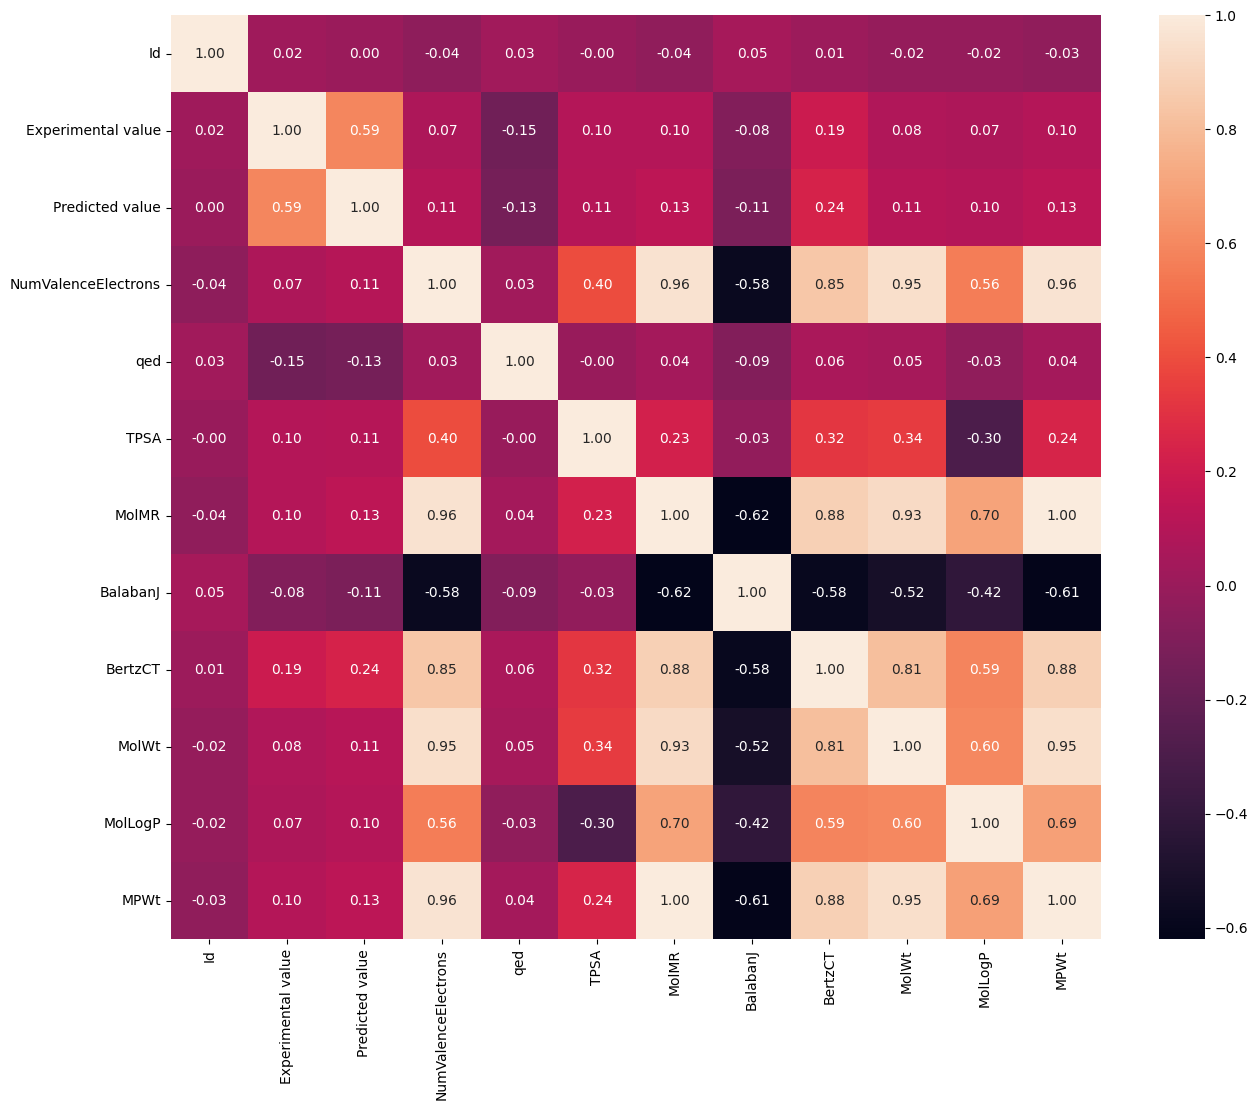

In [76]:
plt.figure(figsize=(15,12))
sns.heatmap(data=new_dt[new_dt.columns].corr(), annot = True, fmt = ".2f")

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,ConfusionMatrixDisplay
X = new_dt.drop(columns=['Id','Experimental value'])
Y= new_dt['Experimental value']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy() 
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train_with_one = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_one = np.c_[np.ones(X_test.shape[0]), X_test]
print('Shape of x_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of x_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)
X.describe()
X_train




Shape of x_train : (4606, 10)
Shape of y_train : (4606,)
Shape of x_test : (1152, 10)
Shape of y_test : (1152,)


array([[1.        , 4.57471098, 4.63285294, ..., 5.52644846, 1.8776    ,
        5.85911094],
       [1.        , 4.61512052, 2.99213961, ..., 5.61418959, 5.0544    ,
        6.17722907],
       [1.        , 4.74493213, 4.42542116, ..., 5.74380095, 3.3281    ,
        6.14706393],
       ...,
       [1.        , 4.76217393, 6.43826418, ..., 5.83877363, 1.87012   ,
        6.1397603 ],
       [0.        , 4.36944785, 7.06931694, ..., 5.47491424, 1.2587    ,
        5.48318034],
       [0.        , 3.8918203 , 6.22739722, ..., 5.09988472, 2.699     ,
        5.27526512]])

In [96]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
X_train
x_train_scaled

array([[ 0.        ,  0.28700838, -0.22262101, ...,  0.1662577 ,
        -0.23818998,  0.0430628 ],
       [ 0.        ,  0.36141556, -0.96058574, ...,  0.32544237,
         1.08549047,  0.47639507],
       [ 0.        ,  0.60044124, -0.31592027, ...,  0.56059028,
         0.36619131,  0.4353049 ],
       ...,
       [ 0.        ,  0.63218905,  0.58942202, ...,  0.73289484,
        -0.24130668,  0.42535607],
       [-1.        , -0.09094823,  0.87325873, ...,  0.07276153,
        -0.49606767, -0.46902011],
       [-1.        , -0.97041691,  0.49457767, ..., -0.6076372 ,
         0.10406358, -0.75223684]])

0.7994791666666666
0.8237986270022883
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       505
           1       0.81      0.83      0.82       647

    accuracy                           0.80      1152
   macro avg       0.80      0.79      0.80      1152
weighted avg       0.80      0.80      0.80      1152

[[381 124]
 [107 540]]


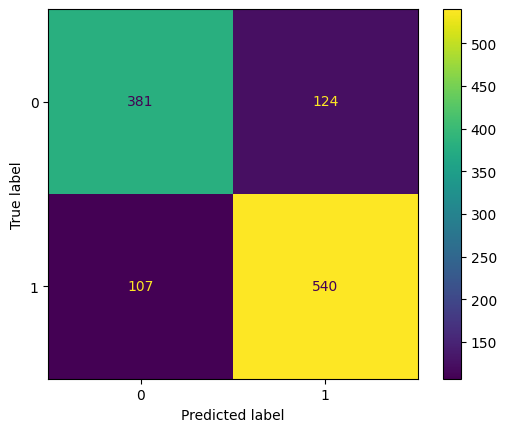

In [99]:

k = 20
knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric="manhattan",)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test,y_pred_knn)
print(accuracy_knn)
print(f1_score_knn)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
y_pred_proba = knn.predict_proba(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn))
disp.plot()

In [98]:
from sklearn.model_selection import cross_val_score
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())


best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Best K: {best_k}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train_scaled, y_train)
test_score = final_knn.score(x_test_scaled, y_test)
print(f"Test Accuracy with K={best_k}: {test_score:.4f}")

Best K: 20
Test Accuracy with K=20: 0.8012
